In [128]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:
obt_slim_path = '../../data/obt_slim.csv'

In [86]:
obt_df = pd.read_csv(obt_slim_path)

C:\Users\batoo\AppData\Local\Temp\ipykernel_81752\4100363895.py:1: DtypeWarning: Columns (6,10,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  obt_df = pd.read_csv(obt_slim_path)


In [92]:
cols = obt_df.columns[obt_df.isna().sum()>0]

for c in cols:
    count = obt_df[c].isna().sum()
    perc = obt_df[c].isna().sum() / len(obt_df)
    print(c, count, perc)

measure_name 2916 0.2655012291723573
payment_measure_id 2569 0.23390694710006374
payment_measure_name 2569 0.23390694710006374
number_of_discharges 4236 0.38568697077301284
readmissions_footnote 10983 1.0
excess_readmission_ratio 2916 0.2655012291723573
predicted_readmission_rate 2916 0.2655012291723573
expected_readmission_rate 2916 0.2655012291723573
calc_err 2916 0.2655012291723573
calc_err_match 2916 0.2655012291723573
number_of_readmissions 4236 0.38568697077301284
readmission_rate 4236 0.38568697077301284
readm_start_date 2916 0.2655012291723573
readm_end_date 2916 0.2655012291723573
payments_start_date 2569 0.23390694710006374
payments_end_date 2569 0.23390694710006374
hospital_type 11 0.0010015478466721297
hospital_ownership 13 0.0011836474551579713
hospital_overall_rating 2454 0.22343621961212784
hospital_overall_rating_footnote 8496 0.7735591368478558
mort_group_measure_count 13 0.0011836474551579713
count_of_facility_mort_measures 1095 0.09969953564599836
count_of_mort_measu

In [107]:
obt_df = obt_df[obt_df['readmissions_footnote'].isna()]
obt_df.dropna(subset='number_of_readmissions',inplace=True)
# presence of footnote means something off with readmissions data

In [ ]:
# measure-name
# 'HIP-KNEE' then 'Total Hip/Knee Arthroplasty'
# 'COPD' then 'Chronic Obstructive Pulmonary Disease'
# 'AMI' then 'Acute Myocardial Infarction'
# 'PN' then 'Pneumonia'
# 'HF' then 'Heart Failure'
# 'CABG' then 'Coronary Artery Bypass Graft'

<Axes: >

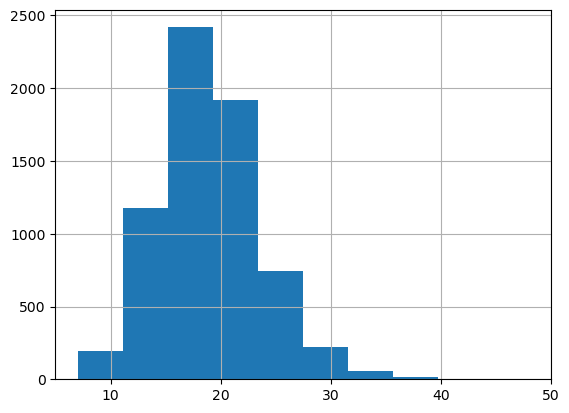

In [124]:
obt_df['readmission_rate'].hist()

In [120]:
for c in obt_df.columns:
    print(c)

facility_name
facility_id
county_name
state
condition
condition_name
measure_name
payment_measure_id
payment_measure_name
number_of_discharges
readmissions_footnote
excess_readmission_ratio
predicted_readmission_rate
expected_readmission_rate
calc_err
calc_err_match
number_of_readmissions
readmission_rate
readm_start_date
readm_end_date
payments_start_date
payments_end_date
address
city
zip_code
hospital_type
hospital_ownership
emergency_services
meets_criteria_for_promoting_interoperability_of_ehrs
hospital_overall_rating
hospital_overall_rating_footnote
mort_group_measure_count
count_of_facility_mort_measures
count_of_mort_measures_better
count_of_mort_measures_no_different
count_of_mort_measures_worse
mort_group_footnote
safety_group_measure_count
count_of_facility_safety_measures
count_of_safety_measures_better
count_of_safety_measures_no_different
count_of_safety_measures_worse
safety_group_footnote
readm_group_measure_count
count_of_facility_readm_measures
count_of_readm_measures

In [153]:
obt_df[['predicted_readmission_rate','expected_readmission_rate','readmission_rate','crowded_housing_percentile']]

,predicted_readmission_rate,expected_readmission_rate,readmission_rate,crowded_housing_percentile
0,19.1885,19.3765,18.0,0.3183
1,17.0029,17.7701,16.0,0.3183
2,23.0374,21.8333,23.0,0.3183
3,16.4506,18.2089,13.0,0.5032
4,15.6895,16.0472,15.0,0.5032
...,...,...,...,...
9426,16.2335,15.8898,17.0,0.9488
9427,24.3028,21.9458,28.0,0.9488
9432,17.3569,17.5325,17.0,0.8402
9433,21.7744,21.9146,21.0,0.8402


<Axes: xlabel='hospital_overall_rating', ylabel='readmission_rate'>

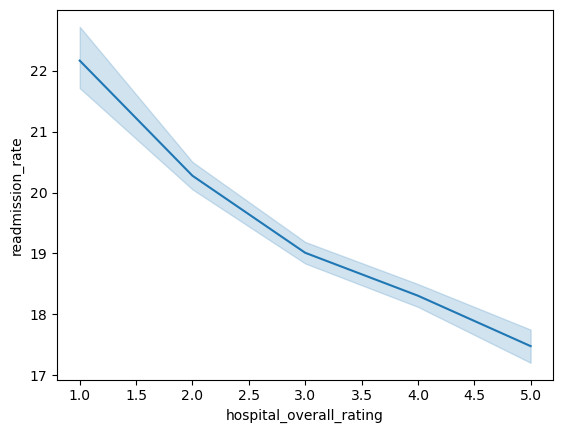

In [140]:
sns.lineplot(obt_df,x='hospital_overall_rating',y='readmission_rate')

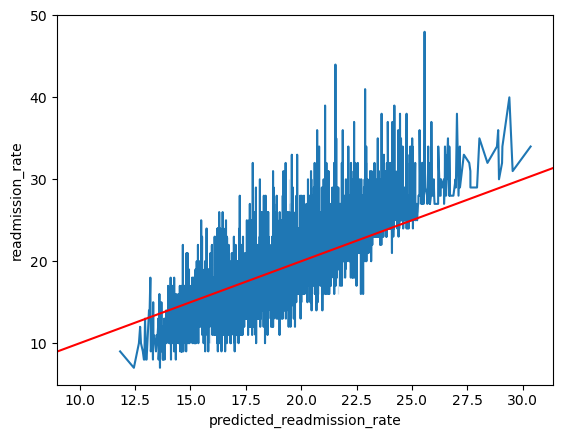

In [148]:
g = sns.lineplot(obt_df,x='predicted_readmission_rate',y='readmission_rate',)
g.axline(xy1=(10,10),slope=1,c='r')

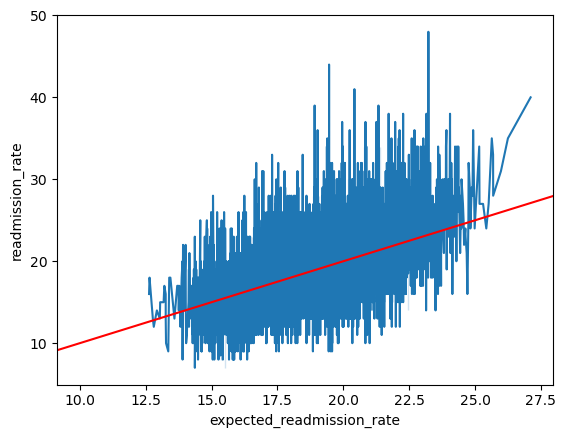

In [149]:
g = sns.lineplot(obt_df,x='expected_readmission_rate',y='readmission_rate',)
g.axline(xy1=(10,10),slope=1,c='r')